### Multiple Linear Regression

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

crime_df = pd.read_csv('crime_data.csv')
crime_df.head()

X1   X2  X3  X4  X5  X6  X7
0  478  184  40  74  11  31  20
1  494  213  32  72  11  43  18
2  643  347  57  70  18  16  16
3  341  565  31  71  11  25  19
4  773  327  67  72   9  29  24

<Axes: >

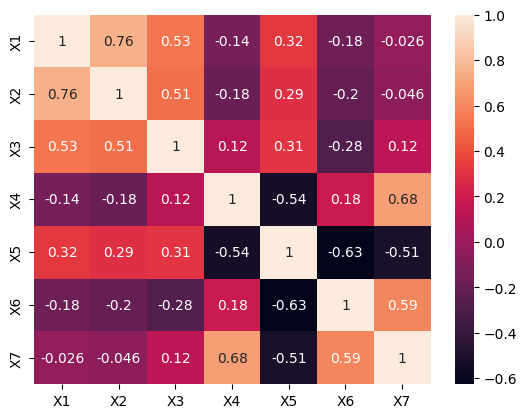

In [6]:
#for multiple linear regressoin (and other models) we need to use
#variables that are as uncorrelated with each other a possible in our equation
correlation = crime_df.corr()
sns.heatmap(correlation, annot =True)


In [14]:
X = crime_df[['X2','X5']]
y = crime_df['X1']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 32)

In [15]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = regression.predict(X_test)
y_pred

array([1150.14172271,  480.45104191,  818.19106585, 1227.55813262,
        793.59725046,  412.11636809,  952.72799954,  460.13293182,
        691.73054259,  632.98594097,  889.21046849,  563.51330147,
       2349.69377312,  943.34788205, 1017.92493373])

In [17]:
accuracy_score = regression.score(X_test, y_test)
accuracy_score

0.4049121409018508

In [20]:
regression.coef_

array([0.53032549, 5.18172689])

In [ ]:
#what is the eqaution for this model?
# X1 * .5303 + 5.1817 * X2

# OLS Regression
OLS (Oridnary Least Squares) regression is a type of linear regression that lets you handle interations as well as features that dont have interactions. With OLS regression you can incorporate features that are correlated with each other.

In [22]:
from statsmodels.formula.api import ols
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [24]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [26]:
diabetes_vs_glucose =ols("Outcome ~ Glucose", data=diabetes_df).fit()
print(diabetes_vs_glucose.params)
intercept, slope = diabetes_vs_glucose.params
# outcome = -.4924 + .00696(glucose)

Intercept   -0.492495
Glucose      0.006960
dtype: float64


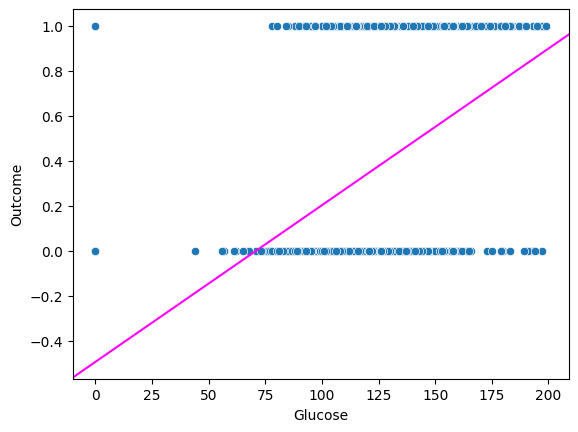

In [27]:
sns.scatterplot(x='Glucose',
                y='Outcome',
                data = diabetes_df)
plt.axline(xy1=(0,intercept),slope=slope, color ='magenta')

In [ ]:
#OLS regression is NOT the answer for modeling this dataset
#because the outcomes are binary and OLS works best when we have a gradient
#of outcomes were trying to predict (continous data) - this data only had 0 or 1 (T or F)
#BUT we can use logistic regression to predict binary outcomes

In [29]:
#these are just example of how the code works
#the outcomes are meaningless
#no interaction - low or no correlation between params used to predict outcome
age_gl_no_int = ols("Outcome ~ Age + Glucose", data = diabetes_df).fit()
print(age_gl_no_int.params)
#outcome = -.6 + .005(AGE) + .006(Glucose)


Intercept   -0.600748
Age          0.005030
Glucose      0.006473
dtype: float64


In [30]:
#with interaction -there is correlation between params used to predict outcomes
age_gl_int = ols('Outcome ~ Age*Glucose', data = diabetes_df).fit()
print(age_gl_int.params)

Intercept     -0.905058
Age            0.014172
Glucose        0.008923
Age:Glucose   -0.000072
dtype: float64
